In [8]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib.patches as mpatches
import math
import matplotlib.lines as mlines
import os
import cv2 as cv
from IPython.display import Video
import matplotlib.cm as cm
import matplotlib.animation as animation
import matplotlib.image as mpimg
from matplotlib.pyplot import figure

In [33]:
wave_start = 7;
wave_stop = 13;
samps    = 20;
waves    = np.linspace(wave_start,wave_stop,samps); #units in microns
numwvs = len(waves);
angle_step = 45;
angle_start = 0;
angle_stop = 135;
angles = list(range(angle_start,angle_stop+angle_step,angle_step));
numangles = len(angles)
imgs = np.zeros([numwvs,numangles,256,320])
std_imgs = np.zeros([numwvs,numangles,256,320])

for i in range(numwvs):
    for j in range(numangles):
        with h5py.File('C:\\Users\\khart\\Documents\\IRCSP2_data\\Jaclyn\\mono_response\\polarized_7_13microns_with_std\\' + str(waves[i]) + 'microns\\' + str(angles[j]) + 'deg.h5', "r") as f:
            # List all groups
           # print(f.keys())
    
            # Get the data
            imgs[i,j,:,:] = np.array(f[list(f.keys())[0]])
            std_imgs[i,j,:,:] = np.array(f[list(f.keys())[1]])

In [34]:
with h5py.File('C:\\Users\\khart\\Documents\\IRCSP2_data\\Jaclyn\\mono_response\\polarized_7_13microns_with_std\\darkfield\\0deg.h5', "r") as f:

    # Get the data
    temp = np.array(f[list(f.keys())[2]])

In [35]:
print('temperature = ' + str(temp) + '\N{DEGREE SIGN}C')

temperature = 33.4°C


In [36]:
np.shape(std)

(20, 256, 320)

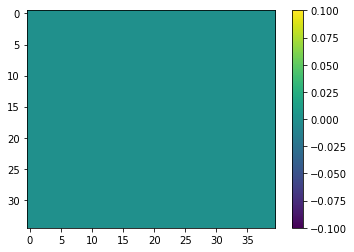

In [37]:
plt.imshow(std[5,ymin:ymax,xmin:xmax])
plt.colorbar()

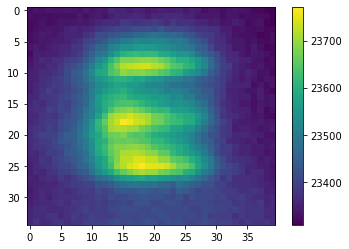

In [38]:
plt.imshow(imgs[4,0,90:125,135:175])
plt.colorbar()

In [39]:
ymin = 90 
ymax = 125
xmin = 135
xmax = 175

In [40]:
darkfield = np.zeros([numangles,256,320])
for j in range(numangles):
    
    with h5py.File('C:\\Users\\khart\\Documents\\IRCSP2_data\\Jaclyn\\mono_response\\polarized_7_13microns\\darkfield\\'+str(angles[j])+'deg.h5', "r") as f:

        # Get the data
        darkfield[j] = np.array(f[list(f.keys())[0]])


#darkfield = [np.mean(darkfield0[ymin:ymax,xmin:xmax]),np.mean(darkfield45[ymin:ymax,xmin:xmax]),np.mean(darkfield90[ymin:ymax,xmin:xmax]),np.mean(darkfield135[ymin:ymax,xmin:xmax])]
#darkfield = [darkfield0,darkfield45,darkfield90,darkfield135]
#darkfield = [np.mean(darkfield0),np.mean(darkfield45),np.mean(darkfield90),np.mean(darkfield135)]

In [41]:
deg0 = imgs[:,0,:,:] - np.mean(darkfield[0])
deg45 = imgs[:,1,:,:] - np.mean(darkfield[1])
deg90 = imgs[:,2,:,:] - np.mean(darkfield[2])
deg135 = imgs[:,3,:,:] - np.mean(darkfield[3])

stokes0 = deg0 + deg90
stokes1 = deg0 - deg90
stokes2 = deg45 - deg135

DOLP = np.sqrt(((stokes1)**2)+((stokes2)**2))/(stokes0)
AOLP = np.arctan2(stokes2,stokes1)/2

Text(0.5, 1.0, 'Img at 0deg and 9.526315789473685microns')

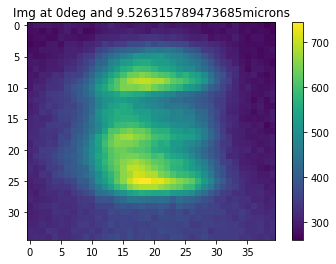

In [42]:
i = 8
plt.imshow(deg0[i][ymin:ymax,xmin:xmax])
plt.colorbar()
plt.title('Img at 0deg and ' +str(waves[i]) +'microns')

Text(0.5, 1.0, 'AOLP at 9.526315789473685 microns')

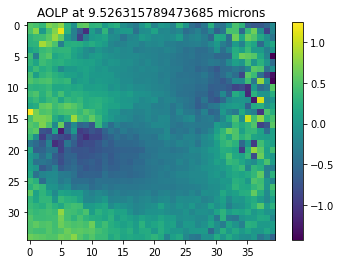

In [43]:
plt.imshow(AOLP[i][ymin:ymax,xmin:xmax])
plt.colorbar()
plt.title('AOLP at ' + str(waves[i]) + ' microns')

Text(0.5, 1.0, 'DOLP at 9.526315789473685 microns')

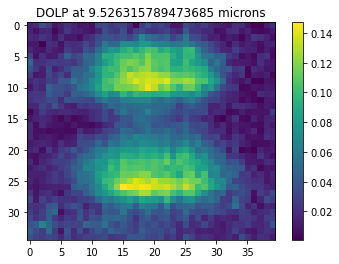

In [44]:
plt.imshow(DOLP[i][ymin:ymax,xmin:xmax])
plt.colorbar()
plt.title('DOLP at ' + str(waves[i]) + ' microns')

In [45]:
np.shape(DOLP[i,ymin:ymax,xmin:xmax])

(35, 40)

In [46]:
DOLPs = np.zeros(numwvs)
for i in range(numwvs):
    DOLPs[i] = np.mean(DOLP[i,ymin+5:ymax-25,xmin+10:xmax-10])

In [47]:
AOLPs = np.zeros(numwvs)
for i in range(numwvs):
    AOLPs[i] = np.mean(AOLP[i,ymin+5:ymax-25,xmin+10:xmax-10])

In [49]:
#std_deg0 = np.sqrt(std_imgs**2 + std_darkfield**2)
std_deg0 = std_imgs[:,0,:,:]
std_deg45 = std_imgs[:,1,:,:]
std_deg90 = std_imgs[:,2,:,:]
std_deg135 = std_imgs[:,3,:,:]

std_stokes0 = np.sqrt(std_deg0**2 + std_deg90**2)
std_stokes1 = std_stokes0
std_stokes2 = np.sqrt(std_deg45**2 + std_deg135**2)

dDOLP_dstokes1 = stokes1/(stokes0*np.sqrt(stokes1**2 + stokes2**2))
dDOLP_dstokes2 = stokes2/(stokes0*np.sqrt(stokes1**2 + stokes2**2))
dDOLP_dstokes0 = (-2*np.sqrt(stokes1**2+stokes2**2))/(stokes0**3)

dAOLP_dstokes2 = (stokes1)/(2*stokes1**2+stokes2**2)
dAOLP_dstokes1 = (-stokes2)/(2*stokes1**2+stokes2**2)

std_DOLP = np.sqrt(dDOLP_dstokes1**2*std_stokes1**2 + dDOLP_dstokes2**2*std_stokes2**2 + dDOLP_dstokes0**2*std_stokes0**2)
std_AOLP = np.sqrt(dAOLP_dstokes1**2*std_stokes1**2 + dAOLP_dstokes2**2*std_stokes2**2)

error_DOLP = np.zeros(len(DOLP))
for i in range(len(DOLP)):
    error_DOLP[i] = np.mean(std_DOLP[i,ymin:ymax,xmin:xmax])

error_AOLP = np.zeros(len(AOLP))
for i in range(len(AOLP)):
    error_AOLP[i] = np.mean(std_AOLP[i,ymin:ymax,xmin:xmax])

In [67]:
error_AOLP

array([0.28863227, 0.49426068, 0.48417498, 0.52162807, 0.49308587,
       0.42108058, 0.43441098, 0.43190676, 0.39522743, 0.36508899,
       0.38950408, 0.44102596, 0.36802887, 0.44422599, 0.37805233,
       0.35631608, 0.29433444, 0.33337487, 0.34238145, 0.34420756])

Text(0, 0.5, 'DOLP [%]')

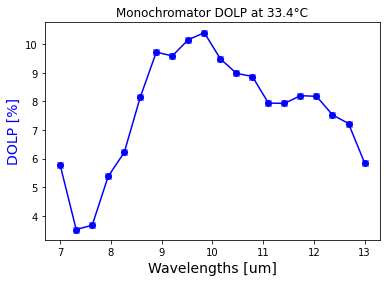

In [75]:
plt.title('Monochromator DOLP at ' + str(temp) +'\N{DEGREE SIGN}C')
plt.plot(waves, DOLPs*100, color="blue", marker="o")
for i in range(len(DOLP)):
    plt.errorbar(waves[i], DOLPs[i]*100, color='blue',yerr=error_DOLP[i],fmt ='x')
plt.xlabel("Wavelengths [um]",fontsize=14)
plt.ylabel("DOLP [%]",color="blue",fontsize=14)

Text(0, 0.5, 'AOLP [°]')

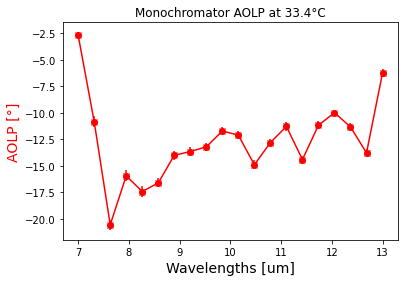

In [77]:
plt.title('Monochromator AOLP at ' + str(temp) +'\N{DEGREE SIGN}C')
plt.plot(waves, AOLPs*(180/np.pi), color="red", marker="o")
for i in range(len(AOLP)):
    plt.errorbar(waves[i], AOLPs[i]*(180/np.pi), color='red',yerr=error_AOLP[i],fmt ='x')
plt.xlabel("Wavelengths [um]",fontsize=14)
plt.ylabel("AOLP [\N{DEGREE SIGN}]",color="red",fontsize=14)

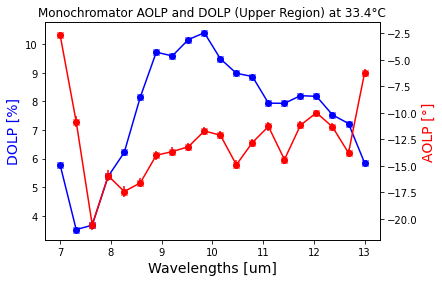

In [79]:
fig,ax = plt.subplots()
plt.title('Monochromator AOLP and DOLP (Upper Region) at ' + str(temp) +'\N{DEGREE SIGN}C')
ax.plot(waves, DOLPs*100, color="blue", marker="o")
for i in range(len(DOLP)):
    plt.errorbar(waves[i], DOLPs[i]*100, color='blue',yerr=error_DOLP[i],fmt ='x')
ax.set_xlabel("Wavelengths [um]",fontsize=14)
ax.set_ylabel("DOLP [%]",color="blue",fontsize=14)
ax2=ax.twinx()
ax2.plot(waves, AOLPs*(180/np.pi), color="red", marker="o")
for i in range(len(AOLP)):
    plt.errorbar(waves[i], AOLPs[i]*(180/np.pi), color='red',yerr=error_AOLP[i],fmt ='x')
ax2.set_ylabel("AOLP [\N{DEGREE SIGN}]",color="red",fontsize=14)
plt.show()

In [24]:
DOLPs = np.zeros(numwvs)
std = np.zeros(numwvs)
for i in range(numwvs):
    DOLPs[i] = np.mean(DOLP[i,ymin+20:ymax-5,xmin+10:xmax-10])
    std[i] = np.mean(std)
AOLPs = np.zeros(numwvs)
for i in range(numwvs):
    AOLPs[i] = np.mean(AOLP[i,ymin+20:ymax-5,xmin+10:xmax-10])

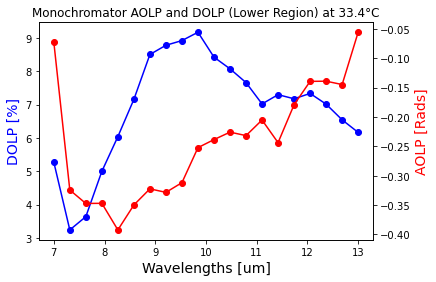

In [25]:
fig,ax = plt.subplots()
plt.title('Monochromator AOLP and DOLP (Lower Region) at ' + str(temp) +'\N{DEGREE SIGN}C')
ax.plot(waves, DOLPs*100, color="blue", marker="o")
ax.set_xlabel("Wavelengths [um]",fontsize=14)
ax.set_ylabel("DOLP [%]",color="blue",fontsize=14)
ax2=ax.twinx()
ax2.plot(waves, AOLPs,color="red",marker="o")
ax2.set_ylabel("AOLP [Rads]",color="red",fontsize=14)
plt.show()

In [ ]:
img = imgs

filenames = []
for i in range(numwvs):
    for j in range(numangles):
        plt.imshow(imgs[i,j,ymin:ymax,xmin:xmax])
        plt.title(str(waves[i]) + ' microns, LP at ' + str(angles[j]) +'degrees')
        plt.colorbar()
        plt.clim(23350,23800)
        filename = 'img'+str(i)+str(j)+'.png'
        filenames.append(filename)
        plt.savefig(filename)
        plt.close()

frames = [] # for storing the generated images
fig = plt.figure(figsize=(20, 20))
plt.axis("off")
for i in range(len(img)):
    frames.append([plt.imshow(mpimg.imread(filenames[i]),animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,repeat_delay=1000)

ani.save('C:\\Users\\khart\\Documents\\IRCSP2_data\\Jaclyn\\mono_response\\imagesanimation.gif', writer='PillowWriter', fps=.5)

for filename in set(filenames):
    os.remove(filename)

In [ ]:

img = AOLP

filenames = []
for i in range(len(img)):
    plt.imshow(img[i,ymin:ymax,xmin:xmax])
    plt.title('AOLP at ' + str(waves[i]) + ' microns')
    plt.colorbar()
    plt.clim(-1.5,1.5)
    filename = 'img'+str(i)+'.png'
    filenames.append(filename)
    plt.savefig(filename)
    plt.close()

frames = [] # for storing the generated images
fig = plt.figure(figsize=(20, 20))
plt.axis("off")
for i in range(len(img)):
    frames.append([plt.imshow(mpimg.imread(filenames[i]),animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,repeat_delay=1000)

ani.save('C:\\Users\\khart\\Documents\\IRCSP2_data\\Jaclyn\\mono_response\\AOLPanimation.gif', writer='PillowWriter', fps=.5)

for filename in set(filenames):
    os.remove(filename)

In [ ]:
img = DOLP

filenames = []
for i in range(len(img)):
    plt.imshow(img[i,ymin:ymax,xmin:xmax])
    plt.title('DOLP at ' + str(waves[i]) + ' microns')
    plt.colorbar()
    plt.clim(0.01,0.15)
    filename = 'img'+str(i)+'.png'
    filenames.append(filename)
    plt.savefig(filename)
    plt.close()

frames = [] # for storing the generated images
fig = plt.figure(figsize=(20, 20))
plt.axis("off")
for i in range(len(img)):
    frames.append([plt.imshow(mpimg.imread(filenames[i]),animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,repeat_delay=1000)

ani.save('C:\\Users\\khart\\Documents\\IRCSP2_data\\Jaclyn\\mono_response\\DOLPanimation.gif', writer='PillowWriter', fps=.5)

for filename in set(filenames):
    os.remove(filename)